# Import Libraries

In [14]:
import numpy as np 
import pandas as pd 
import os,gc,pathlib
from sklearn.metrics import confusion_matrix
from fastai import *
from fastai.vision import *
from fastai.vision.models import *
print(os.listdir("./brain_tumor_dataset"))
import torchvision.models as models
from fastai.vision import *
from fastai import *
from fastai.vision.data import ImageDataLoaders

['yes', 'no']


# Make Data

In [9]:
DATA_DIR='./brain_tumor_dataset'

In [10]:
os.listdir(f'{DATA_DIR}')

['yes', 'no']

In [20]:
from fastai import *
data = ImageDataLoaders.from_folder(DATA_DIR, train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(flip_vert=True, max_warp=0),
                                  size=224,bs=8, 
                                  num_workers=0).normalize(imagenet_stats)
print(f'Classes: \n {data.classes}')

NameError: name 'get_transforms' is not defined

In [22]:
data.show_batch(rows=10, figsize=(10,5))

AttributeError: module 'fastai.data' has no attribute 'show_batch'

In [0]:
learner = create_cnn(data, models.vgg16, metrics=[accuracy], callback_fns=ShowGraph,  model_dir="/tmp/model/")

/opt/conda/lib/python3.6/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


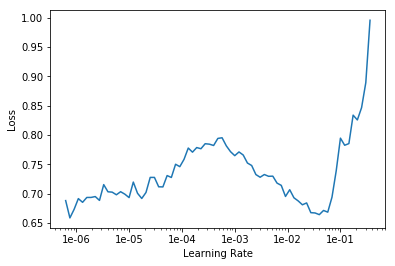

In [0]:
learner.lr_find()
learner.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.678433,0.367434,0.800000,00:58
1,0.583768,0.270103,0.860000,00:58
2,0.577935,0.463664,0.840000,00:58
3,0.578515,0.584662,0.820000,00:58
4,0.553138,0.473937,0.840000,00:58
5,0.542196,0.362595,0.820000,00:58
6,0.500461,0.228921,0.880000,00:58
7,0.486845,0.203506,0.940000,00:58
8,0.408142,0.251278,0.880000,00:58
9,0.357666,0.229046,0.900000,01:04


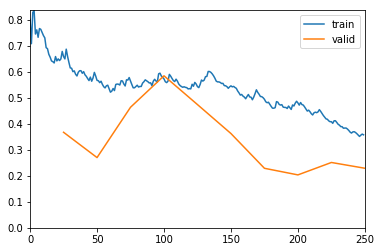

In [0]:
learner.fit_one_cycle(10, max_lr=slice(1e-2))

In [0]:
learner.save('stage-1')

In [0]:
learner.unfreeze()

In [0]:
learner.lr_find()
learner.recorder.plot()

In [0]:
learner.load('stage-1')

In [0]:
learner.fit_one_cycle(10,max_lr=slice(1e-06,1e-05))

In [0]:
#learn.save('stage-2')

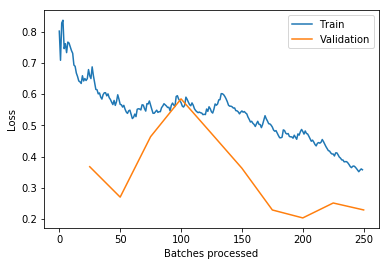

In [0]:
learner.recorder.plot_losses()

In [0]:
interp = ClassificationInterpretation.from_learner(learner)

In [0]:
interp.plot_top_losses(10, figsize=(4,4))

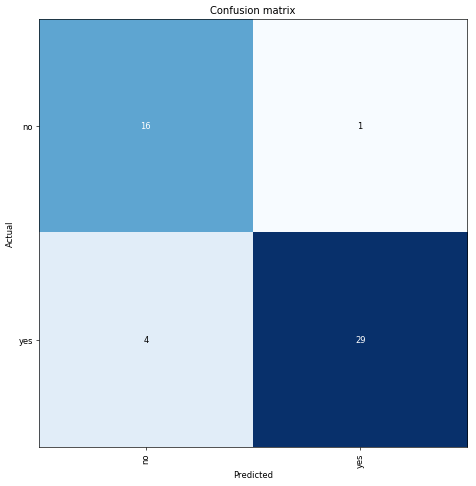

In [0]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)